## Loading Data

When we gather data from whatever instrument we're using it doesn't usually come in the form of numpy array

Usually it will be in some kind of plain text

We need to figure out how to convert that to an array so we can do our math or graphs

One function we're going to learn about here is `numpy.loadtxt` this function opens a text (.txt) file and turns the contents into an array

In [1]:
# ====== CELL 1: Viewing Files with Command Line ======

# this command lists out all the files in the current directory (folder)
! ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


<br><br><br><br><br><br>

In [2]:
# ====== CELL 2: Opening Files with Command Line ======

# this command prints out the contents of a file
! more basic.txt

4
2
9
2
0
2
2
5
1
0


<br><br><br><br><br><br>

In [3]:
# ====== CELL 3: Importing NumPy and loadtxt ======

# that's not a python array though
# let's import numpy
# % pip install numpy
import numpy as np

# and try using loadtxt
file = np.loadtxt('basic.txt')

<br><br><br><br><br><br>

In [4]:
# ====== CELL 4: loadtxt Results ======

print(file)

print(type(file))

[4. 2. 9. 2. 0. 2. 2. 5. 1. 0.]
<class 'numpy.ndarray'>


<br><br><br><br><br><br>

In [5]:
# ====== CELL 5: Files with Text ======

# let's try another file

file2 = np.loadtxt('headers.txt')

ValueError: could not convert string to float: 'time'

<br><br><br><br><br><br>

In [6]:
# ====== CELL 5: Headers ======

# The end of our error message says "could not convert string to float: 'time'"
# let's take a look at what the file is

! more headers.txt

time
0
0.25
0.4
0.8
0.9
1.3
1.7
2
2.5


<br><br><br><br><br><br>

In [7]:
# ====== CELL 6: Skiprows ======

# loadtxt ONLY accepts numbers
# we're going to have to skip that row
# luckily this is built right in to loadtxt

file2 = np.loadtxt('headers.txt', skiprows=1)

print(file2)

[0.   0.25 0.4  0.8  0.9  1.3  1.7  2.   2.5 ]


<br><br><br><br><br><br>

In [8]:
# ====== CELL 7: Multicolumn Files ======

# so this is great if your file is just a list of numbers with a new number on each line
# but what if you measured say, distance at a variety of time values
# you would have two columns
# can loadtxt handle that?

# let's take a look at our next file before we start loading it

! more multicol.txt

time, distance, speed
0, 0, 0.5
1, 0.5, 0.5
2, 1, 1
3, 2, 1
4, 3, 1
5, 4, 1
6, 5, 1
7, 6, 1
8, 7, 1
9, 8, 1
10, 9, 1


<br><br><br><br><br><br>

In [9]:
# ====== CELL 8: Multicolumn Files ======

# we can see we'll need to use skiprows=1

file3 = np.loadtxt('multicol.txt',skiprows=1)

ValueError: could not convert string to float: '0,'

<br><br><br><br><br><br>

In [10]:
# ====== CELL 9: Delimiters ======

# Our error is complaining that '0,' cannot be converted to a float
# Lots of data files use commas to separate the different values
# We need to tell numpy that a comma is just a separator for the different columns

file3 = np.loadtxt('multicol.txt', skiprows=1 , delimiter=',')

print(file3)

[[ 0.   0.   0.5]
 [ 1.   0.5  0.5]
 [ 2.   1.   1. ]
 [ 3.   2.   1. ]
 [ 4.   3.   1. ]
 [ 5.   4.   1. ]
 [ 6.   5.   1. ]
 [ 7.   6.   1. ]
 [ 8.   7.   1. ]
 [ 9.   8.   1. ]
 [10.   9.   1. ]]


<br><br><br><br><br><br>

In [11]:
# ====== CELL 10: Unpack ======

# looks like numpy made an array from each row rather than each column
# we want an array of times, and array of distances, and an array of speeds
# we're going to add one more parameter to loadtxt

file3 = np.loadtxt('multicol.txt', skiprows=1 , delimiter=',', unpack=True)

print(file3)

[[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10. ]
 [ 0.   0.5  1.   2.   3.   4.   5.   6.   7.   8.   9. ]
 [ 0.5  0.5  1.   1.   1.   1.   1.   1.   1.   1.   1. ]]


<br><br><br><br><br><br>

In [12]:
# ======= CELL 11: Data ======

# unpack the file into arrays
times = file3[0]
distances = file3[1]
speeds = file3[2]

# check the arrays
print(times)
print(distances)
print(speeds)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.  0.5 1.  2.  3.  4.  5.  6.  7.  8.  9. ]
[0.5 0.5 1.  1.  1.  1.  1.  1.  1.  1.  1. ]


<br><br><br><br><br><br>

In [13]:
# ======= CELL 12: MatPlotLib Setup======

# install the libraries needed for plotting
#% pip install matplotlib
import matplotlib.pyplot as plt

# change the default plot size
plt.rcParams['figure.figsize'] = 12,8

<br><br><br><br><br><br>

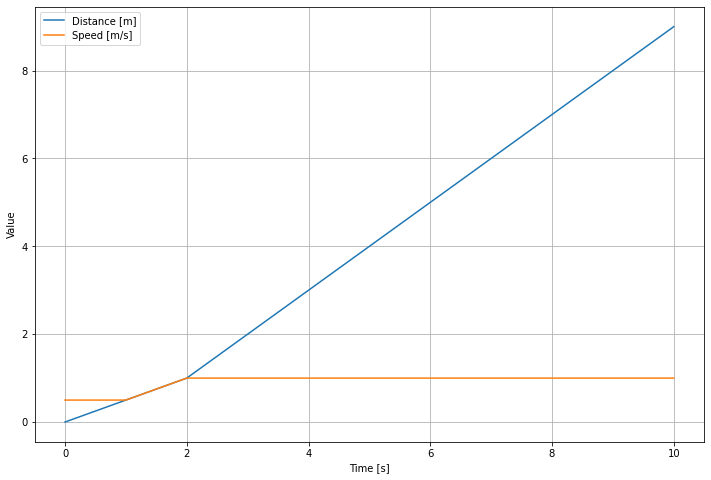

In [14]:
# ======= CELL 12: Plotting Speed and Distance ======

plt.plot(times, distances, label="Distance [m]")
plt.plot(times, speeds, label="Speed [m/s]")

plt.xlabel("Time [s]")
plt.ylabel("Value")

plt.legend()
plt.grid() # new! just shows the grid
plt.show()

<br><br><br><br><br><br>

In [15]:
# ======= CELL 13: Viewing the Error File ======

! more errors.txt

time, timeError, distance, distanceError, speed
0, 0.1, 0, 0.5, 0.5
1, 0.1, 0.5, 0.5, 0.5
2, 0.1, 1, 0.5, 1
3, 0.1, 2, 0.5, 1
4, 0.1, 3, 0.5, 1
5, 0.1, 4, 0.5, 1
6, 0.1, 5, 0.5, 1
7, 0.1, 6, 0.5, 1
8, 0.1, 7, 0.5, 1
9, 0.1, 8, 0.5, 1
10, 0.1, 9, 0.5, 1


<br><br><br><br><br><br>

In [16]:
# ======= CELL 14: Load in Error Data ======

file4 = np.loadtxt('errors.txt', skiprows=1 , delimiter=',', unpack=True)

# unpack into arrays
times = file4[0]
timeError = file4[1]
distances = file4[2]
distanceError = file4[3]
speed = file4[4]

<br><br><br><br><br><br>

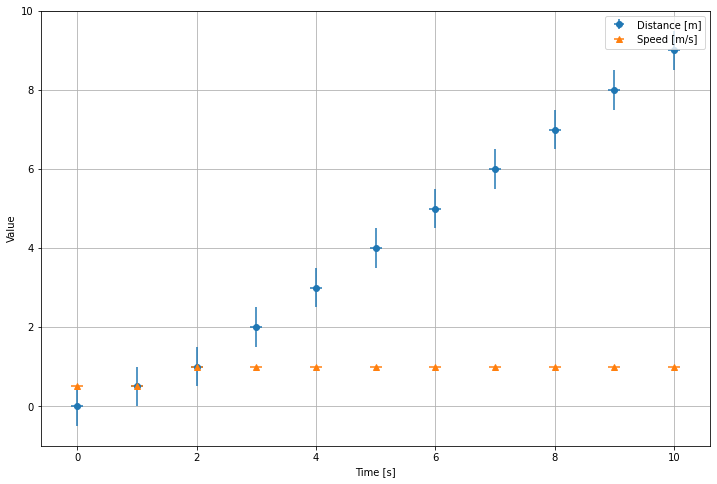

In [17]:
# ======= CELL 15: Plotting with Errorbars ======

plt.errorbar(times, distances, xerr=timeError, yerr=distanceError,fmt='o',label="Distance [m]")
plt.errorbar(times, speeds, xerr=timeError,fmt='^',label="Speed [m/s]")

plt.xlabel("Time [s]")
plt.ylabel("Value")

plt.grid()
plt.legend()
plt.show()

## What about the error on the speed?
<br><br><br><br><br><br>
## We have to calculate that!
<br><br><br><br><br><br>
$$v = \frac{\Delta \text{distance}}{\Delta\text{time}}$$

Since our device measures speed for us and we didn't calculate it we'll omit the deltas and just use the speed and distance arrays

$$ \frac{\delta v}{v} = \sqrt{\left(\frac{\delta\text{distance}}{\text{distance}}\right)^2+\left(\frac{\delta\text{time}}{\text{time}}\right)^2}$$

$$ \delta v = v \times \sqrt{\left(\frac{\delta\text{distance}}{\text{distance}}\right)^2+\left(\frac{\delta\text{time}}{\text{time}}\right)^2}$$

In [18]:
# ======= CELL 16: Calculating Speed Error ======

speedError = [] 

for i in range(len(speed)): # for every speed value
    distancePart = distanceError[i] / distances[i] # calculate the first fraction
    speedPart = timeError[i] / times[i] # and the second fraction
    
    factor = np.sqrt(distancePart**2 + speedPart**2) # combine them under the square root

    speedError.append(speed[i]*factor) # multiply and append to the speedError list


<ipython-input-18-0ec9ac1bd858>:6: RuntimeWarning: divide by zero encountered in double_scalars
  distancePart = distanceError[i] / distances[i] # calculate the first fraction
<ipython-input-18-0ec9ac1bd858>:7: RuntimeWarning: divide by zero encountered in double_scalars
  speedPart = timeError[i] / times[i] # and the second fraction


<br><br><br><br><br><br>

In [19]:
# ======= CELL 17: Calculating Speed Error Pt 2======

speedError = [] 

for i in range(1,len(speed)): # new! starting at 1!
    distancePart = distanceError[i] / distances[i]
    timePart = timeError[i] / times[i]
    
    factor = np.sqrt(distancePart**2 + speedPart**2)

    speedError.append(speed[i]*factor)
    
print(speedError) # very small! would not show up on graph

[0.5024937810560445, 0.5024937810560445, 0.2522124325070259, 0.1685312368013057, 0.12658988901172163, 0.10137937550497034, 0.08454895668840334, 0.0725140732294534, 0.06347997156681355]
